In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.color as skic
import skimage.filters as skif
from skimage.feature import canny
import skimage.data as skid
import skimage.util as sku
import skimage.morphology as skm
import skimage.segmentation as sksg
from skimage import io
from src.train2 import eval_single

/work/FAC/FGSE/ISTE/asamsu/detect/venv_pytorch_gpu/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from src.dataset_benchm import expand_wide_fractures_gt, dilate_labels

In [3]:
import matplotlib.pyplot as plt

In [4]:
path_gt = 'data/test_ovas/kl5/kl5-s3-gt.jpeg'
path_img = 'data/test_ovas/kl5/kl5-s3.png'
path_pred = 'outputs_BM_/unet-huber-rmspro-0.1/2025-08-14_16-43/pred_proba_kl5-s3.png'
gt = io.imread(path_gt)[1500:2500, 500:1500]
img = io.imread(path_img)[1500:2500, 500:1500, :3]
pred = io.imread(path_pred)[1500:2500, 500:1500]

In [5]:
# plt.imshow(io.imread(path_img))

# plt.imshow(io.imread(path_img)[2000:2500, 350:850, :3])

# plt.imshow(io.imread(path_img)[1000:1500, 500:1000, :3])

# plt.imshow(img)

# plt.imshow(pred, cmap='gray')

# plt.imshow(gt, cmap='gray')

((gt/255.).sum()/(500*500))*100

np.float64(2.9403827450980398)

In [6]:
path_gt = 'data/test_ovas/kl5/kl5-s3-gt.jpeg'
path_img = 'data/test_ovas/kl5/kl5-s3.png'
path_pred = 'outputs_BM_/unet-huber-rmspro-0.1/2025-08-14_16-43/pred_proba_kl5-s3.png'
gt = io.imread(path_gt)[2000:2500, 350:850]
img = io.imread(path_img)[2000:2500, 350:850, :3]
pred = io.imread(path_pred)[2000:2500, 350:850]

gt = expand_wide_fractures_gt(img.astype(np.uint8), gt)
gt = dilate_labels(gt)
gt = gt / 255.
gt = np.float64(gt > 0.1)

gray = skic.rgb2gray(img[:, :, :3])

gabor_img, _ = skif.gabor(gray, frequency=.7)
gabor_img = np.uint8(gabor_img < .12)
gabor_img = skm.dilation(gabor_img, skm.disk(2))
# gabor_img = skm.erosion(gabor_img, skm.disk(1))
# gabor_img = skm.dilation(gabor_img, skm.disk(5))
# gabor_img = np.float64(dilate_labels(gabor_img) > 0)
# gabor_img = np.float64(gabor_img < .12)

# pred = dilate_labels(pred)
pred = pred / 255.
pred = np.float64(pred > .3)
pred = skm.dilation(pred, skm.disk(3))

np.float64(8.820400000000001)

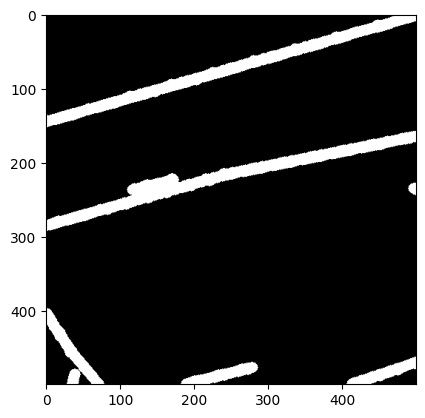

In [7]:
plt.imshow(gt, cmap='gray')

(gt.sum()/(500*500))*100

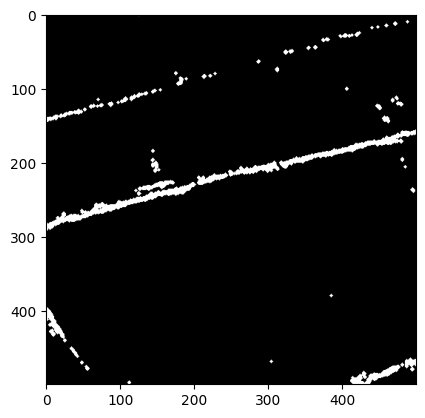

In [8]:
plt.imshow(gabor_img, cmap='gray')

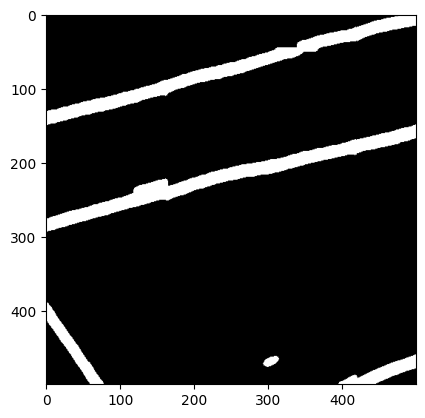

In [9]:
plt.imshow(pred, cmap='gray')

In [10]:
eval_single(gt, gabor_img)

/work/FAC/FGSE/ISTE/asamsu/detect/venv_pytorch_gpu/lib/python3.11/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: DiceScore metric currently defaults to `average=micro`, but will change to`average=macro` in the v1.9 release. If you've explicitly set this parameter, you can ignore this warning.
  warnings.warn(*args, **kwargs)


{'mse': 0.06289999932050705,
 'psnr': 12.013492584228516,
 'ssim': 0.8545289635658264,
 'ae': 0.06289999932050705,
 'acc': 0.9370999932289124,
 'f1': 0.4728284478187561,
 'prec': 0.9066597819328308,
 'rec': 0.3198041021823883,
 'spec': 0.9968150854110718,
 'dice': 0.4728284478187561,
 'iou': 0.3096105754375458,
 'roc_auc': 0.6583095788955688}

In [11]:
eval_single(gt, pred)

{'mse': 0.02778800018131733,
 'psnr': 15.561427116394043,
 'ssim': 0.9015092253684998,
 'ae': 0.02778800018131733,
 'acc': 0.972212016582489,
 'f1': 0.842966616153717,
 'prec': 0.8403641581535339,
 'rec': 0.8455852270126343,
 'spec': 0.9844614267349243,
 'dice': 0.842966616153717,
 'iou': 0.7285585999488831,
 'roc_auc': 0.9150233268737793}

In [12]:
eval_single(gt, gt)

{'mse': 0.0,
 'psnr': inf,
 'ssim': 1.0,
 'ae': 0.0,
 'acc': 1.0,
 'f1': 1.0,
 'prec': 1.0,
 'rec': 1.0,
 'spec': 1.0,
 'dice': 1.0,
 'iou': 1.0,
 'roc_auc': 1.0}

In [13]:
eval_single(gt, np.ones(gt.shape))

{'mse': 0.911795973777771,
 'psnr': 0.401023268699646,
 'ssim': 0.03851041570305824,
 'ae': 0.911795973777771,
 'acc': 0.08820399641990662,
 'f1': 0.16210931539535522,
 'prec': 0.08820399641990662,
 'rec': 1.0,
 'spec': 0.0,
 'dice': 0.16210931539535522,
 'iou': 0.08820399641990662,
 'roc_auc': 0.5}

In [14]:
eval_single(gt, np.zeros(gt.shape))

{'mse': 0.08820399641990662,
 'psnr': 10.545116424560547,
 'ssim': 0.861311137676239,
 'ae': 0.08820399641990662,
 'acc': 0.911795973777771,
 'f1': 0.0,
 'prec': 0.0,
 'rec': 0.0,
 'spec': 1.0,
 'dice': 0.0,
 'iou': 0.0,
 'roc_auc': 0.5}

In [15]:
eval_single(gt, np.random.randint(0, 2, gt.shape))

{'mse': 0.5010120272636414,
 'psnr': 3.0015182495117188,
 'ssim': 0.0003436239785514772,
 'ae': 0.5010120272636414,
 'acc': 0.49898800253868103,
 'f1': 0.15029136836528778,
 'prec': 0.08836434036493301,
 'rec': 0.5023354887962341,
 'spec': 0.49866417050361633,
 'dice': 0.15029136836528778,
 'iou': 0.08125137537717819,
 'roc_auc': 0.5004998445510864}